In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [12]:
#1a
df = pd.read_csv('SpotifyFeatures.csv', sep=',')

print(f'We have {len(df)} songs')

print(f'We have {len(df.columns)} song properties')

We have 232725 songs
We have 18 song properties


In [13]:
# 1b

reduced_df = df.loc[df.genre.isin({'Pop', 'Classical'}), ['genre', 'loudness', 'liveness']].copy()
reduced_df['genre'] = reduced_df.genre.apply(lambda x: 1 if x == 'Pop' else 0)

print(f'{sum(reduced_df.genre)} of the songs are Pop')
print(f'{len(reduced_df.genre) - sum(reduced_df.genre)} of the songs are Classical')

9386 of the songs are Pop
9256 of the songs are Classical


In [14]:
# 1c

X = reduced_df[['loudness', 'liveness']].values
# add extra dimension for intercept
X = np.hstack((X, np.ones((X.shape[0], 1))))

sample_labels = reduced_df.genre.values

X_train, X_test, y_train, y_test = train_test_split(X, sample_labels, test_size=0.2, shuffle=True, stratify=sample_labels, random_state=0)

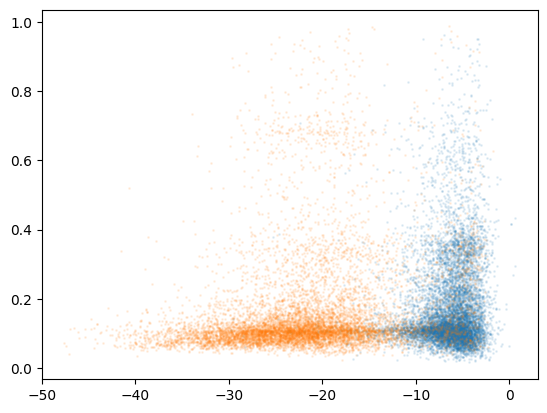

In [15]:
# 1d

pop_songs = np.array([X[i] for i in range(len(X)) if sample_labels[i] == 1])
classical_songs = np.array([X[i] for i in range(len(X)) if sample_labels[i] == 0])

plt.scatter(pop_songs[:,0], pop_songs[:,1], alpha = 0.1, s=1)
plt.scatter(classical_songs[:,0], classical_songs[:,1], alpha = 0.1, s=1)
plt.show()

accuracy of model is: 92.52%


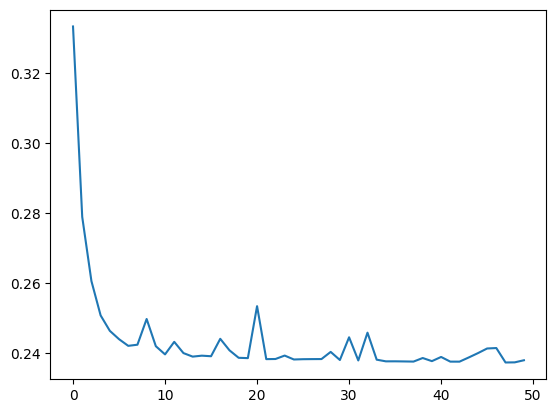

In [16]:
# 2a

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def predict(features, weights):
    return sigmoid(features @ weights)

def cost_function(features, labels, weights):
    predictions = predict(features, weights)
    return (-labels*np.log(predictions) - (1-labels)*np.log(1-predictions)).sum() / labels.shape[0]

def update_weights(features, labels, weights, lr):
    for x, y in zip(features, labels):
        prediction = predict(x, weights)
        weights -= x*(prediction - y) * lr
    return weights

epochs = 50
learning_rate = 0.001
weights = np.array([0.0, 0.0, 0.0])
cost = []

for i in range(epochs):
    idx = np.arange(X_train.shape[0])
    np.random.shuffle(idx)
    update_weights(X_train[idx], y_train[idx], weights, learning_rate)
    cost.append(cost_function(X_test, y_test, weights))

plt.plot(cost)

prediction = np.where(predict(X_train,weights) > 0.5, 1,0)

print(f'accuracy of model is: {(np.sum(prediction == y_train))/len(prediction) * 100:.2f}%')

In [17]:
# 2b

prediction = np.where(predict(X_test,weights) > 0.5, 1,0)

print(f'accuracy of model is: {(np.sum(prediction == y_test))/len(prediction) * 100:.2f}%')

accuracy of model is: 92.73%


In [18]:
# 3a

from sklearn.metrics import confusion_matrix

print(confusion_matrix(prediction, y_test))

[[1661   81]
 [ 190 1797]]


In [19]:
# 3b

